# 2: Lakers data
로스앤젤레스 레이커스(LA Lakers)는 미국 캘리포니아주 로스앤젤레스를 연고로 하는 NBA 서부 콘퍼런스 퍼시픽 디비전 소속 프로농구 팀으로, NBA 우승 17회를 기록한 명문팀  
이 데이터는 2008-2009 시즌의 LA 레이커스 경기에 대한 기록

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
lakers = pd.read_csv('/content/drive/MyDrive/Data/2. 실습자료/Ch 02_파이썬 실습 Lakers/Lakers.csv')

In [3]:
lakers.head(5)

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


# Columns Info
* Date: 경기 일자  
* Opponent: 대전 팀  
* Game type: 홈경기 vs. 원정경기  
* Time: 분 : 초  
* Period: 쿼터(한 쿼터당 12분 씩, 동점일 경우 5 쿼터 진행)
* Etype: 유형(ejection / foul / free throw / jump ball / rebound / shot / sub / timeout / turnover / violation
퇴장 / 파울 / 자유투/ 점프볼/ 리바운드/ 슛/ 패스 / 타임아웃/ 턴오버/ 반칙)
* Team: 팀 구분(LAL: LA Lakers, 상대팀)  
* Player: 선수명  
* Result: 결과  
* Points: 점수  
* Type: 세부행동  
* X, Y: 상대편 팀 골대 뒤에서 바라본 X, Y 좌표. 골대의 위치는 (25, 5.25)이다.

* 범주형 변수: *빈도frequency 계산 가능*
               opponent, game_type, period, etype, team, player, resuts, type
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               시간 변수(date, time), result, x, y

In [4]:
lakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


In [5]:
lakers.describe(include=np.object)

<ipython-input-5-67f22d83d668>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lakers.describe(include=np.object)


,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [6]:
print('Oppenent: ', lakers['opponent'].unique())
print('Game type: ', lakers['game_type'].unique())
print('Period: ', lakers['period'].unique())
print('Etype: ', lakers['etype'].unique())
print('Team: ', lakers['team'].unique())
print('Result: ', lakers['result'].unique())
print('Points: ', lakers['points'].unique())
print('Type: ', lakers['type'].unique())

Oppenent:  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game type:  ['home' 'away']
Period:  [1 2 3 4 5]
Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team:  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Result:  [nan 'missed' 'made']
Points:  [0 2 1 3]
Type:  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fa

In [7]:
print("Total number of data : ", lakers.shape[0]*lakers.shape[1])
print("Total number of missing value : {} = 전체 데이터의 {:.2f}% ".format(lakers.isnull().sum().sum(), (lakers.isnull().sum().sum()*100)/(lakers.shape[0]*lakers.shape[1])))
print("Teams that have played against the LA Lakers : ", lakers['opponent'].nunique()-1)
print("Number of actions featured in the match : ", lakers['etype'].nunique())
print("The number of detailed actions that appear in the game : ", lakers['type'].nunique())

Total number of data :  450112
Total number of missing value : 76625 = 전체 데이터의 17.02% 
Teams that have played against the LA Lakers :  28
Number of actions featured in the match :  10
The number of detailed actions that appear in the game :  73


* LA레이커스의 홈 경기 vs. 원정경기 비율은?
* 경기에서 선수들이 가장 많이 하는 행동유형(etype)은?
* 이번 시즌에서 LA레이커스의 경기 결과는?
* LA레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 했는가?

In [8]:
lakers['date'] = lakers['date'].apply(str)
lakers['datetime'] = lakers['date'] + ' ' + lakers['time']
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [9]:
lakers['datetime'] = pd.to_datetime(lakers['datetime'],format='%Y%m%d %H:%M:%S')
lakers['date'] = pd.to_datetime(lakers['date'],format='%Y%m%d')
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [10]:
lakers.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

In [11]:
print(lakers.index[lakers['x'] == '0'].tolist())
print(lakers.index[lakers['y'] == '0'].tolist())

[]
[]


In [12]:
lakers['x'].fillna(0, inplace=True)
lakers['y'].fillna(0, inplace=True)
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


홈 경기 vs 원정 경기 비율

In [13]:
lakers[['date','game_type']].groupby(['date','game_type']).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [14]:
lakers[['date','game_type']].groupby(['date','game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [15]:
df1 = lakers.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


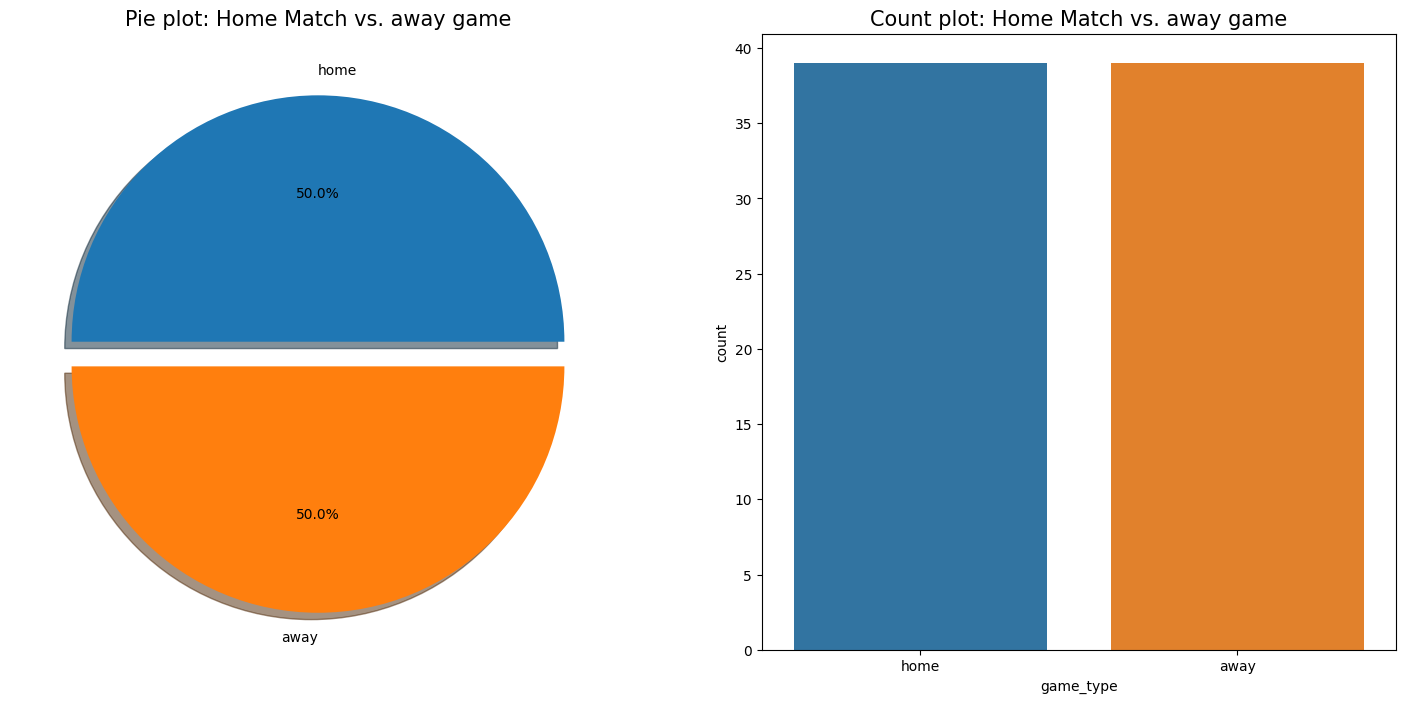

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
df1['game_type'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot: Home Match vs. away game', size = 15)
ax[0].set_ylabel('') #y 라벨 없애기

#count plot
sns.countplot(x='game_type', data=df1, ax=ax[1])
ax[1].set_title('Count plot: Home Match vs. away game', size = 15)

plt.show()

경기에서 발생한 행동 유형 확인

In [17]:
print('Etype: ', lakers['etype'].unique())

Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [18]:
lakers['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

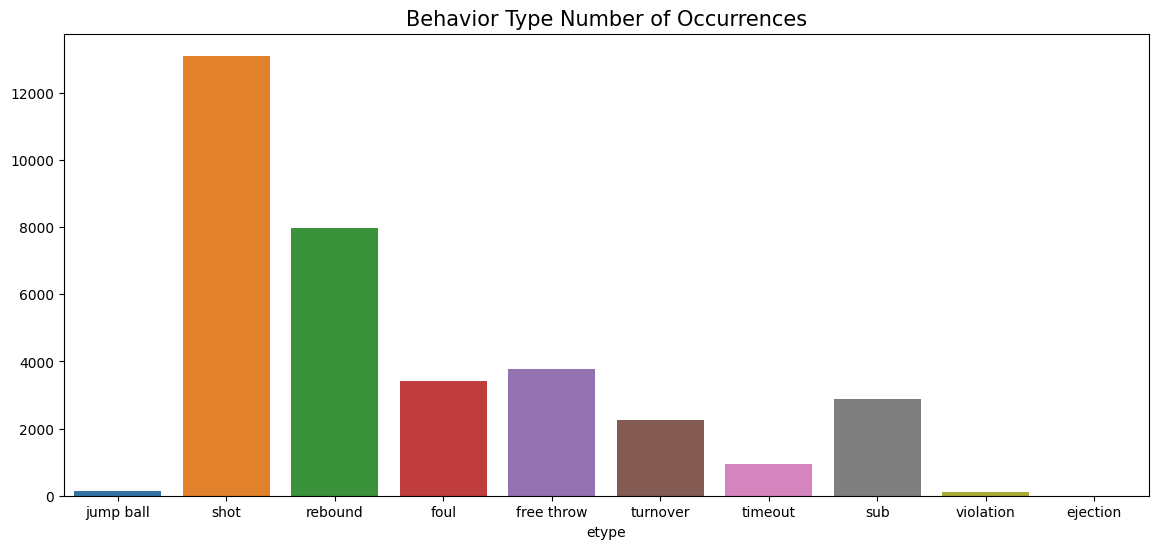

In [19]:
f, ax = plt.subplots(1, 1, figsize=(14, 6))

sns.countplot(x=lakers['etype'], ax=ax)
ax.set_title('Behavior Type Number of Occurrences', size=15)
ax.set_ylabel('')

plt.show()

In [20]:
df2 = lakers.groupby(['etype','period']).size().reset_index().pivot(columns='period',index='etype', values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


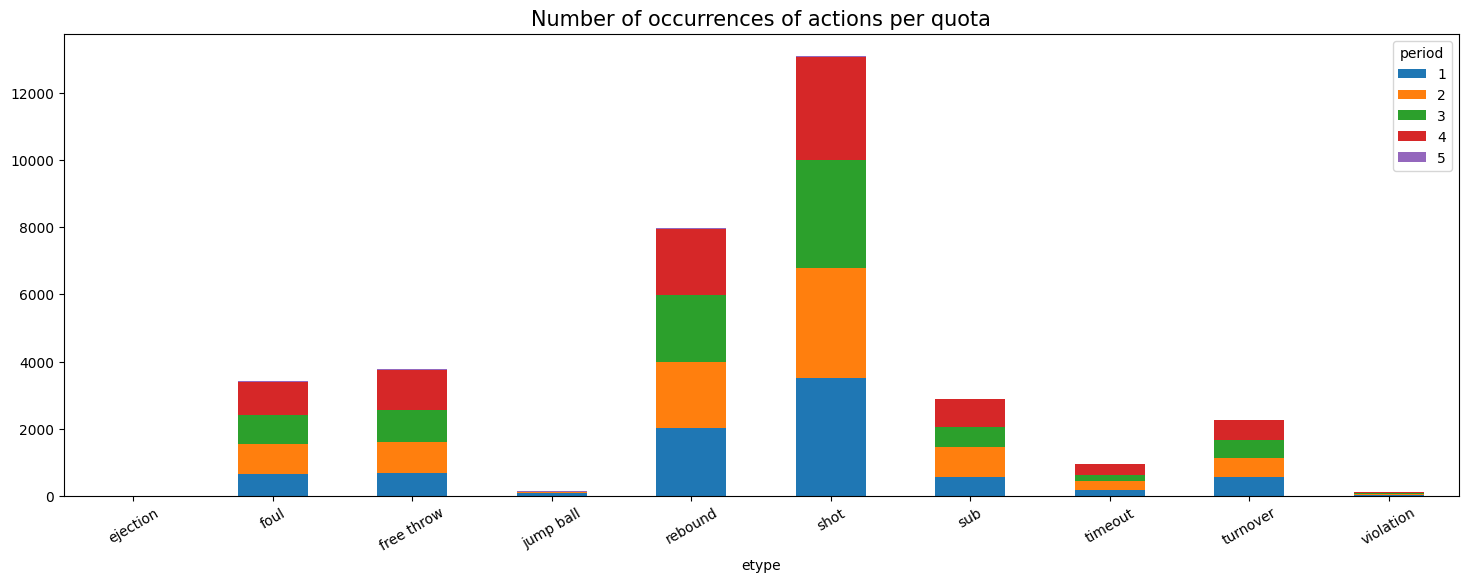

In [21]:
df2.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Number of occurrences of actions per quota', size=15)
plt.xticks(rotation=30)

plt.show()

경기 결과 집계 및 시계열 그래프

In [22]:
made = lakers['result'].isin(['made'])
lakers[made].head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [23]:
df3 = lakers[made][['date', 'team', 'points']].groupby(['date', 'team'], as_index=True).sum()
df3

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [24]:
df3.reset_index(inplace=True)
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [25]:
lal = df3[df3['team'] == 'LAL']
opp = df3[df3['team'] != 'LAL']

In [26]:
lal

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [27]:
df4 = pd.merge(lal, opp, on='date')
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [28]:
win = df4[df4['points_x'] > df4['points_y']]
los = df4[df4['points_x'] < df4['points_y']]
win.shape[0]
print("In the 08-09 season, the Los Angeles Lakers won {} out of {} total games.".format(df4[df4['points_x'] > df4['points_y']].shape[0], df4.shape[0] ))

In the 08-09 season, the Los Angeles Lakers won 63 out of 78 total games.


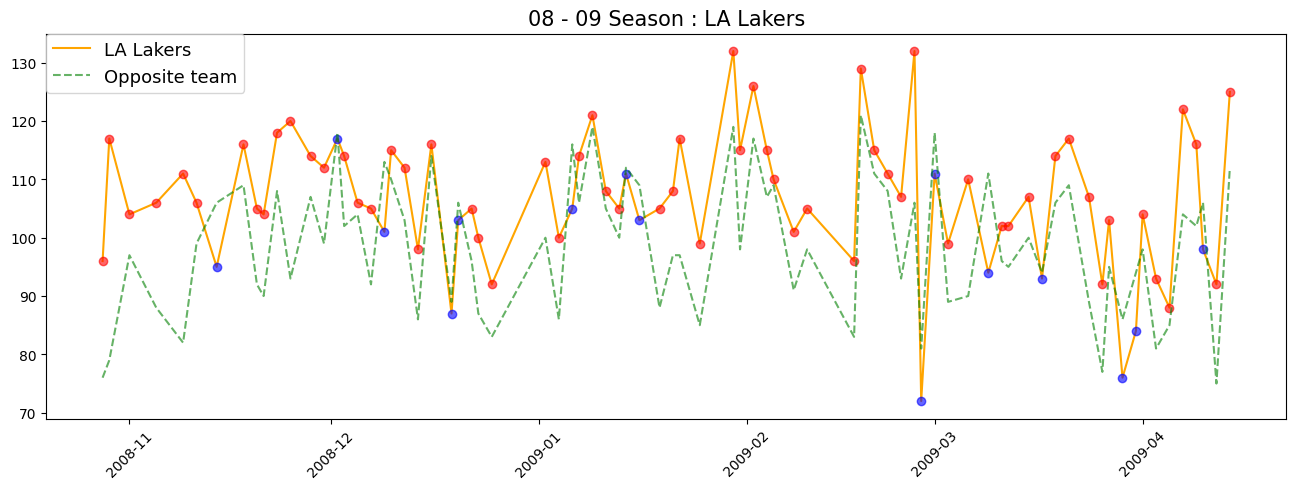

In [29]:
plt.figure(figsize=(16,5))

plt.title("08 - 09 Season : LA Lakers", fontsize=15)

#LA 레이커스 점수 오렌지
plt.plot(lal['date'], lal["points"], "-", alpha= 1, color = 'orange', label='LA Lakers')

#LA 레이커스가 이긴 날 빨간 점, 진 날 파란 점
plt.plot(win['date'], win["points_x"], 'o', alpha=.6, color = 'red')
plt.plot(los['date'], los["points_x"], 'o', alpha=.6, color = 'blue')

#상대팀 점수 초록색 점선
plt.plot(opp['date'], opp["points"], "--", alpha=.6, color = 'green', label='Opposite team')

plt.legend(loc='upper left', borderaxespad=0, fontsize=13)
plt.xticks(rotation=45)

plt.show()

LA 레이커스 팀 코트 위치별 행동

In [30]:
lal2 = lakers[lakers['team'] == 'LAL']
lal2

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,0.0,0.0,2009-04-14 00:27:00


슛한 위치 확인/득점 위치 확인

<ipython-input-31-8b92698f58ca>:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  g4 = sns.kdeplot(data=lal2, x='x', y='y', hue='points', palette='Set3', ax=ax[1])


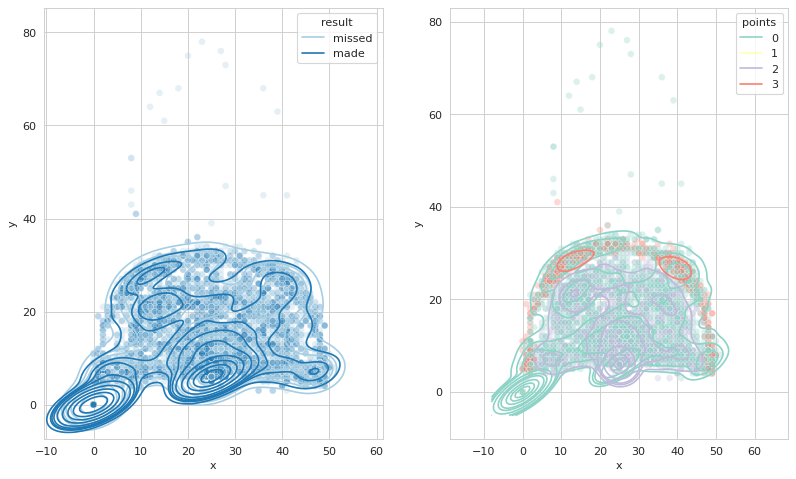

In [31]:
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 2, figsize=(12, 7), dpi = 80)

#득점 성공/실패 분포
g1 = sns.scatterplot(data=lal2, x='x', y='y', hue='result', alpha = 0.3, palette='Paired', ax=ax[0])
g2 = sns.kdeplot(data=lal2, x='x', y='y', hue='result', palette='Paired', ax=ax[0])

#득점 점수 별 분포
g3 = sns.scatterplot(data=lal2, x='x', y='y', hue='points', alpha = 0.3, palette='Set3', ax=ax[1])
g4 = sns.kdeplot(data=lal2, x='x', y='y', hue='points', palette='Set3', ax=ax[1])

plt.show()

위에서 x, y NaN을 0으로 처리함 따라서 0근처에 몰림

가장 많이한 세부 행동

In [32]:
lal3 = lal2[lal2['type'].isin(lal2['type'].value_counts().head(10).index)]
lal3

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,2009-04-14,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,2009-04-14 02:12:00
34605,2009-04-14,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,0.0,0.0,2009-04-14 02:06:00
34611,2009-04-14,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,0.0,0.0,2009-04-14 01:27:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00


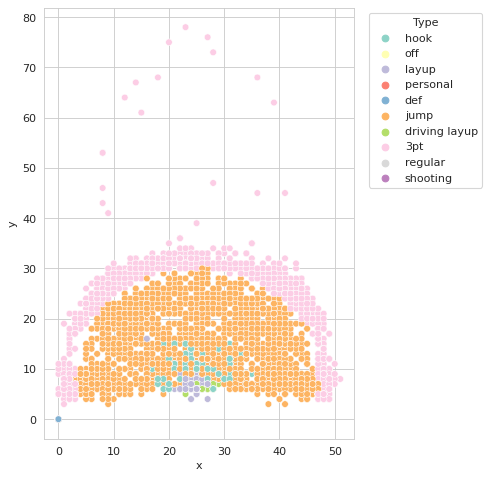

In [33]:
#세부 행동 별 위치
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 1, figsize=(5, 7), dpi = 80)

sns.scatterplot(data=lal3, x='x', y='y', hue=lal3['type'], palette='Set3', ax=ax)

ax.legend(title='Type', bbox_to_anchor= (1.03, 1))

plt.show()

* LA레이커스 데이터:  
총 데이터 개수:  450112
총 결측치 수: 76625 = 전체 데이터의 17.02%
LA레이커스와 경기한 팀 수:  28
경기에 등장하는 행동 수:  10
경기에 등장하는 세부행동 수:  73

* LA레이커스의 홈 경기 vs. 원정경기 비율?  
  : 홈 경기와 원정경기를 1:1 비율로 치룸.
* 경기에서 선수들이 가장 많이 하는 행동유형(etype)?
  : 슛을 가장 많이 하고 그 다음으로는 리바운드.
* 이번 시즌에서 LA레이커스의 경기 결과?  
  : 08 - 09 시즌에 LA 레이커스는 총 78회의 경기 중, 63번 우승했다.
* LA레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 했는가?
  : 상대편 골대 기준으로 왼쪽에서 슛 했을 때 더 많이 성공함

* 더 분석해볼 점은?  
  : x, y 좌표의 NaN에 0을 넣지 않는 것이 분석 결과에 더 좋을것 같음  
  : 특정 선수의 행동 패턴 분석
